In [1]:
class ParticleColoring:
    def __init__(self, graph):
        self.graph = graph
        self.num_nodes = len(graph)
        self.colors = {node: None for node in graph}  # Početno, nijedan čvor nije obojen
        self.personal_best_colors = None
        self.personal_best_fitness = float('inf')  # Početna vrednost za najbolju ocenu
        
    def calculate_fitness(self):
        unique_colors = len(set(self.colors.values()))
        return unique_colors

    def update_position(self):
        for node in self.graph:
            neighbor_colors = set(self.colors[neighbor] for neighbor in self.graph[node] if self.colors[neighbor] is not None)
            new_color = 0
            while new_color in neighbor_colors:
                new_color += 1
            self.colors[node] = new_color

    @classmethod
    def update_global_best(cls, personal_best_fitness, personal_best_colors):
        if personal_best_fitness < cls.swarm_best_fitness:
            cls.swarm_best_fitness = personal_best_fitness
            cls.swarm_best_colors = personal_best_colors.copy()

def pso_coloring(graph, swarm_size, num_iters):
    ParticleColoring.swarm_best_colors = None
    ParticleColoring.swarm_best_fitness = float('inf')
    
    swarm = [ParticleColoring(graph) for _ in range(swarm_size)]
    
    for i in range(num_iters):
        for particle in swarm:
            particle.update_position()
            fitness = particle.calculate_fitness()
            if fitness < particle.personal_best_fitness:
                particle.personal_best_fitness = fitness
                particle.personal_best_colors = particle.colors.copy()
                ParticleColoring.update_global_best(fitness, particle.personal_best_colors)
    
    print("Best colors:", ParticleColoring.swarm_best_colors)
    print("Best fitness:", ParticleColoring.swarm_best_fitness)
    return ParticleColoring.swarm_best_colors, ParticleColoring.swarm_best_fitness


Best colors: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 0, 'F': 0, 'G': 1, 'H': 1, 'I': 2, 'J': 0}
Best fitness: 4


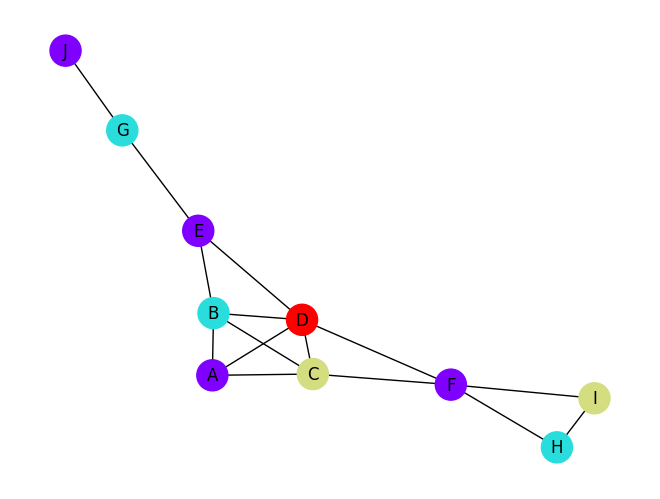

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_graph(graph, colors):
    G = nx.Graph(graph)
    node_colors = [colors[node] for node in G.nodes()]
    nx.draw(G, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, node_size=500)
    plt.show()

# Primer korišćenja:
graph = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'C', 'D', 'E'],
    'C': ['A', 'B', 'D', 'F'],
    'D': ['A', 'B', 'C', 'E', 'F'],
    'E': ['B', 'D', 'G'],
    'F': ['C', 'D', 'H', 'I'],
    'G': ['E', 'J'],
    'H': ['F', 'I'],
    'I': ['F', 'H'],
    'J': ['G']
}

best_colors, best_fitness = pso_coloring(graph, swarm_size=10, num_iters=100)

# Iscrtavanje grafa sa najboljim bojenjem
plot_graph(graph, best_colors)
